In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

df=pd.read_csv(r'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
pd.set_option("display.max_columns",None)

In [100]:
df.shape

(450, 26)

In [101]:
df.drop_duplicates(inplace=True)
df.shape

(450, 26)

In [102]:
print ( 'There are {} different companies in the dataset.'.format (df['Company Name'].nunique()))

There are 439 different companies in the dataset.


In [103]:
print ( 'The number of jobs created in Queens borough is {}.'.format(int(df['Job created'][df['Borough']=='Queens'].sum())))

The number of jobs created in Queens borough is 102.


In [104]:
print ('There are {} unique number of email addresses in the dataset.'.format(int(df['company email'].nunique())))

There are 420 unique number of email addresses in the dataset.


In [105]:
df[df['Company Name'].duplicated(keep=False)]


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
33,Albert Einstein College of Medicine R&D,Jack Zencheck,mwinkle1@yu.edu,7184308977,1196 Pierce Avenue,Bronx,NY,10461,Other,Research facility,ECSP,222,NaN,NaN,02/18/2020,"75,096.36","263,184.07",Bronx,40.848176,-73.846583,211.0,13.0,286.0,2044325.0,2.040900e+09,Van Nest-Morris Park-Westchester Square
34,Albert Einstein College of Medicine R&D,Jack Zencheck,mwinkle1@yu.edu,7184308977,1196 Pierce Avenue,Bronx,NY,10461,Other,Research facility,ECSP,"2,614",NaN,NaN,07/02/2015,"985,418.13","5,779,327.33",Bronx,40.848176,-73.846583,211.0,13.0,286.0,2044325.0,2.040900e+09,Van Nest-Morris Park-Westchester Square
161,FEDERAL EXPRESS,Samuel Adamson,sam.adamson@fedex.com,7187886000,830 Fountain Avenue,Brooklyn,NY,11239,Commercial,OVERNIGHT SHP.,ECSP,77,NaN,NaN,07/08/2015,"64,896.54","357,832.21",Brooklyn,40.659816,-73.866717,305.0,42.0,1070.0,3346449.0,3.044520e+09,East New York
162,FEDERAL EXPRESS,Samuel Adamson,sam.adamson@fedex.com,7187886000,830 Fountain Avenue,Brooklyn,NY,11239,Commercial,OVERNIGHT SHP.,ECSP,221,NaN,NaN,07/05/2007,867.85,"378,098.57",Brooklyn,40.659816,-73.866717,305.0,42.0,1070.0,3346449.0,3.044520e+09,East New York
163,FEDERAL EXPRESS,Samuel Adamson,sam.adamson@fedex.com,7187886000,830 Fountain Avenue,Brooklyn,NY,11239,Commercial,OVERNIGHT SHP.,ECSP,193,NaN,NaN,09/09/2008,"9,210.43","467,120.83",Brooklyn,40.659816,-73.866717,305.0,42.0,1070.0,3346449.0,3.044520e+09,East New York
172,FRESH DIRECT LLC,JOE LACY,gbennett@freshdirect.com,2128222203,23-30 BORDEN AVENUE,Queens,NY,11101,Manufacturing,MFG. PERIS. FOOD,ECSP,200,NaN,NaN,10/05/2010,"33,328.86","453,415.19",Queens,40.739918,-73.947213,402.0,26.0,1.0,4436621.0,4.000680e+09,Hunters Point-Sunnyside-West Maspeth
173,FRESH DIRECT LLC,JOE LACY,gbennett@freshdirect.com,2128222203,23-30 BORDEN AVENUE,Queens,NY,11101,Manufacturing,MFG. PERIS. FOOD,ECSP,"2,565",NaN,NaN,08/08/2017,"740,244.55","1,989,179.05",Queens,40.739918,-73.947213,402.0,26.0,1.0,4436621.0,4.000680e+09,Hunters Point-Sunnyside-West Maspeth
226,"JetBlue Airways, Corp.",Dave Barger,Dave.Barger.@Jetblue.com,718-286-79,27-01 Bridge Plaza North,Long Island City,NY,11101,Other,Back Office,ECSP,"3,878",NaN,NaN,12/04/2013,"759,480.44","5,502,522.03",Queens,40.750561,-73.939315,401.0,26.0,33.0,4005016.0,4.004160e+09,Queensbridge-Ravenswood-Long Island City
227,"JetBlue Airways, Corp.",Dave Barger,Dave.Barger.@Jetblue.com,718-286-79,27-01 Bridge Plaza North,Long Island City,NY,11101,Other,Back Office,ECSP,880,NaN,NaN,06/04/2013,"57,634.59","592,457.59",Queens,40.750561,-73.939315,401.0,26.0,33.0,4005016.0,4.004160e+09,Queensbridge-Ravenswood-Long Island City
241,"KEPCO, INC.",MARTIN KUPFERBERG,NaN,7184617000,131-10 & 131-40 MAPLE AVENUE,Queens,NY,11352,Manufacturing,MFG. ELECTRONIC EQUIPMENT,ECSP,41,NaN,NaN,01/31/2008,"1,736.57","117,077.08",Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df['NTA_counts']=df['NTA'].str.count('-')+1

In [110]:
df['Total Savings'] = df['Total Savings'].str.replace(',', '').astype(float)
df['Avg_saving_per_NTA']=df['Total Savings']/df['NTA_counts']
df['Avg_job_created_per_NTA']=df['Job created']/df['NTA_counts']

In [111]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,NTA_counts,Avg_saving_per_NTA,Avg_job_created_per_NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,1.0,0.00,NaN
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,"4,423,698.05",New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy,4.0,34144.55,NaN
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,"1,238",NaN,NaN,01/05/2015,302959.40,"1,814,542.62",New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan,2.0,151479.70,NaN
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25,NaN,NaN,02/03/2020,2159.67,"6,755.31",Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,1.0,2159.67,NaN
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,"2,699",NaN,NaN,06/30/2017,922407.32,"3,293,055.08",New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,2.0,461203.66,NaN


In [112]:
df_four_NTA=df.loc[df['NTA_counts']>=4]

In [113]:
df_four_NTA.to_csv('Day4.csv',index=False)

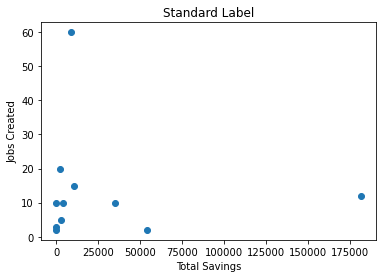

In [116]:
plt.scatter(df['Total Savings'],df['Job created'])
plt.title('Standard Label')
plt.xlabel('Total Savings')
plt.ylabel('Jobs Created')
plt.show()

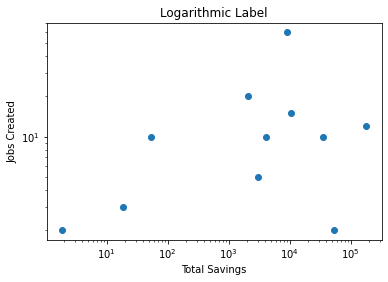

In [117]:
plt.scatter(df['Total Savings'],df['Job created'])
plt.title('Logarithmic Label')
plt.xlabel('Total Savings')
plt.ylabel('Jobs Created')
plt.yscale("log")
plt.xscale("log")
plt.show()

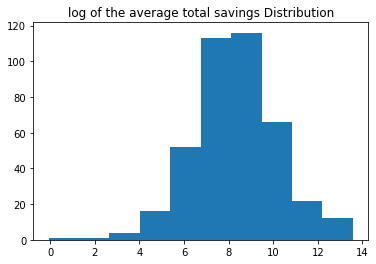

In [125]:
positive=df['Avg_saving_per_NTA'][df['Avg_saving_per_NTA']>0]
plt.hist(np.log(positive))
plt.title('log of the average total savings Distribution')
plt.show()

In [127]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,NTA_counts,Avg_saving_per_NTA,Avg_job_created_per_NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,1.0,0.00,NaN
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,"4,423,698.05",New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy,4.0,34144.55,NaN
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,"1,238",NaN,NaN,01/05/2015,302959.40,"1,814,542.62",New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan,2.0,151479.70,NaN
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25,NaN,NaN,02/03/2020,2159.67,"6,755.31",Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,1.0,2159.67,NaN
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,"2,699",NaN,NaN,06/30/2017,922407.32,"3,293,055.08",New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,2.0,461203.66,NaN


In [131]:
df['Date']=pd.to_datetime(df['Effective Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_21752\1738488257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(['Date'],inplace=True)


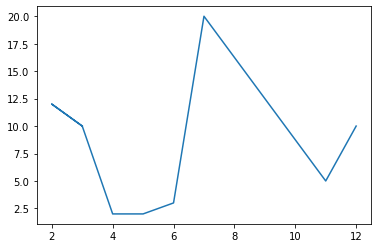

In [149]:
df2=df.dropna()
df2.sort_values(['Date'],inplace=True)
plt.plot(df2['Date'].dt.month,df2['Job created'])
plt.show()